## Final Project Submission

Please fill out:
* Student name: Ian Butler
* Student pace: full time
* Scheduled project review date/time: 08/05/2022 02:00 PM
* Instructor name: David Elliott
* Blog post URL:


#### 1. Drop Irrelevant Columns

#### 2. Handle Missing Values

#### 3. Convert Categorical Features into Numbers

#### 4. Preprocess Test Data

In [1]:
# Your code here - remember to use markdown cells for comments as well!

## Lab Setup

### Getting the Data

In [2]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import MissingIndicator
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!ls

CONTRIBUTING.md
LICENSE.md
README.md
data
halfway-there.gif
student.ipynb


In [4]:
cd data

C:\Users\ianbu\Documents\Flatiron\dsc-phase-2-project-v2-3\data


In [5]:
!ls

column_names.md
kc_house_data.csv


In [6]:
cd ..

C:\Users\ianbu\Documents\Flatiron\dsc-phase-2-project-v2-3


In [7]:
file_path = './data/kc_house_data.csv'
original_df = pd.read_csv(file_path)
original_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [8]:
df = original_df.copy()
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [9]:
y = df["price"]
X = df.drop("price", axis=1)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [11]:
print(f"X_train is a DataFrame with {X_train.shape[0]} rows and {X_train.shape[1]} columns")
print(f"y_train is a Series with {y_train.shape[0]} values")

assert X_train.shape[0] == y_train.shape[0]

X_train is a DataFrame with 16197 rows and 20 columns
y_train is a Series with 16197 values


#### Fitting a Model

In [12]:
model = LinearRegression()
# model.fit(X_train, y_train)

## 1. Drop Irrelevant Columns

In [13]:
relevant_columns = [
    'id',
    'bedrooms',
    'bathrooms',
    'sqft_living',
    'sqft_lot',
    'floors',
    'waterfront',
    'condition',
    'grade',
    'yr_built',
]

X_train = X_train[relevant_columns]

X_train.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
6405,3905080280,3,2.50,1880,4499,2.0,NO,Average,8 Good,1993
937,5466420030,3,2.50,2020,6564,1.0,NO,Average,7 Average,1994
19076,2623069010,5,4.00,4720,493534,2.0,NO,Very Good,9 Better,1975
15201,4443800545,2,2.00,1430,3880,1.0,NO,Good,7 Average,1949
13083,9485930120,3,2.25,2270,32112,1.0,NO,Good,8 Good,1980


In [14]:
assert X_train.shape[0] == 16197

assert X_train.shape[1] == len(relevant_columns)

## 2. Handle Missing Values

In [15]:
X_train.isna().sum()

id                0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront     1756
condition         0
grade             0
yr_built          0
dtype: int64

### Waterfront

In [16]:
X_train["waterfront"].value_counts()

NO     14330
YES      111
Name: waterfront, dtype: int64

In [17]:
X_train["waterfront"].isna().value_counts()

False    14441
True      1756
Name: waterfront, dtype: int64

In [18]:
X_train[X_train["waterfront"].isna()].head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
10881,9407100310,3,2.50,1260,11877,1.0,NaN,Average,7 Average,1975
14092,3211600650,3,1.00,1000,8018,1.0,NaN,Average,7 Average,1969
19429,582000644,4,2.00,1990,6000,1.0,NaN,Average,9 Better,1956
2264,522049104,5,1.75,2340,9148,2.0,NaN,Average,7 Average,1957
9558,1310700210,3,1.75,1970,10270,1.0,NaN,Good,8 Good,1966


In [19]:
X_train['waterfront'] = X_train['waterfront'].fillna('NO')
X_train[X_train["waterfront"].isna()].head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built


In [20]:
X_train["waterfront"].isna().value_counts()

False    16197
Name: waterfront, dtype: int64

In [21]:
X_train["waterfront"].value_counts()

NO     16086
YES      111
Name: waterfront, dtype: int64

In [22]:
X_train.isna().sum()

id             0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
waterfront     0
condition      0
grade          0
yr_built       0
dtype: int64

In [23]:
assert X_train.shape[0] == 16197

assert X_train.shape[1] == len(relevant_columns)

## 3. Convert Categorical Features into Numbers

In [24]:
# model.fit(X_train, y_train)

In [25]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16197 entries, 6405 to 15795
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           16197 non-null  int64  
 1   bedrooms     16197 non-null  int64  
 2   bathrooms    16197 non-null  float64
 3   sqft_living  16197 non-null  int64  
 4   sqft_lot     16197 non-null  int64  
 5   floors       16197 non-null  float64
 6   waterfront   16197 non-null  object 
 7   condition    16197 non-null  object 
 8   grade        16197 non-null  object 
 9   yr_built     16197 non-null  int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 1.4+ MB


In [26]:
print(X_train['waterfront'].value_counts())
print()
print(X_train['condition'].value_counts())
print()
print(X_train['grade'].value_counts())

NO     16086
YES      111
Name: waterfront, dtype: int64

Average      10525
Good          4238
Very Good     1287
Fair           129
Poor            18
Name: condition, dtype: int64

7 Average        6718
8 Good           4608
9 Better         1936
6 Low Average    1506
10 Very Good      851
11 Excellent      295
5 Fair            188
12 Luxury          69
4 Low              17
13 Mansion          8
3 Poor              1
Name: grade, dtype: int64


### Binary Categories

In [27]:
waterfront_train = X_train[['waterfront']]

encoder_waterfront = OrdinalEncoder()

encoder_waterfront.fit(waterfront_train)

encoder_waterfront.categories_[0]

array(['NO', 'YES'], dtype=object)

In [28]:
waterfront_encoded_train = encoder_waterfront.transform(waterfront_train)

waterfront_encoded_train = waterfront_encoded_train.flatten()

waterfront_encoded_train

array([0., 0., 0., ..., 0., 0., 0.])

In [29]:
X_train['waterfront'] = waterfront_encoded_train

X_train.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
6405,3905080280,3,2.50,1880,4499,2.0,0.0,Average,8 Good,1993
937,5466420030,3,2.50,2020,6564,1.0,0.0,Average,7 Average,1994
19076,2623069010,5,4.00,4720,493534,2.0,0.0,Very Good,9 Better,1975
15201,4443800545,2,2.00,1430,3880,1.0,0.0,Good,7 Average,1949
13083,9485930120,3,2.25,2270,32112,1.0,0.0,Good,8 Good,1980


In [30]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16197 entries, 6405 to 15795
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           16197 non-null  int64  
 1   bedrooms     16197 non-null  int64  
 2   bathrooms    16197 non-null  float64
 3   sqft_living  16197 non-null  int64  
 4   sqft_lot     16197 non-null  int64  
 5   floors       16197 non-null  float64
 6   waterfront   16197 non-null  float64
 7   condition    16197 non-null  object 
 8   grade        16197 non-null  object 
 9   yr_built     16197 non-null  int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 1.4+ MB


### Multiple Categories

In [31]:
condition_categories = [['Poor', 'Fair', 'Average', 'Good', 'Very Good']]

condition_train = X_train[['condition']]

encoder_condition = OrdinalEncoder(categories = condition_categories)

encoder_condition.fit(condition_train)

encoder_condition.categories_[0]

array(['Poor', 'Fair', 'Average', 'Good', 'Very Good'], dtype=object)

In [32]:
condition_encoded_train = encoder_condition.transform(condition_train)

condition_encoded_train = condition_encoded_train.flatten()

condition_encoded_train

array([2., 2., 4., ..., 3., 2., 2.])

In [33]:
X_train['condition'] = condition_encoded_train

X_train.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
6405,3905080280,3,2.50,1880,4499,2.0,0.0,2.0,8 Good,1993
937,5466420030,3,2.50,2020,6564,1.0,0.0,2.0,7 Average,1994
19076,2623069010,5,4.00,4720,493534,2.0,0.0,4.0,9 Better,1975
15201,4443800545,2,2.00,1430,3880,1.0,0.0,3.0,7 Average,1949
13083,9485930120,3,2.25,2270,32112,1.0,0.0,3.0,8 Good,1980


In [34]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16197 entries, 6405 to 15795
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           16197 non-null  int64  
 1   bedrooms     16197 non-null  int64  
 2   bathrooms    16197 non-null  float64
 3   sqft_living  16197 non-null  int64  
 4   sqft_lot     16197 non-null  int64  
 5   floors       16197 non-null  float64
 6   waterfront   16197 non-null  float64
 7   condition    16197 non-null  float64
 8   grade        16197 non-null  object 
 9   yr_built     16197 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.4+ MB


In [35]:
# model.fit(X_train, y_train)

In [36]:
grade_categories = [['3 Poor',
                     '4 Low',
                     '5 Fair',
                     '6 Low Average',
                     '7 Average',
                     '8 Good',
                     '9 Better',
                     '10 Very Good',
                     '11 Excellent',
                     '12 Luxury',
                     '13 Mansion']]

grade_train = X_train[['grade']]

encoder_grade = OrdinalEncoder(categories = grade_categories)

encoder_grade.fit(grade_train)

encoder_grade.categories_[0]

array(['3 Poor', '4 Low', '5 Fair', '6 Low Average', '7 Average',
       '8 Good', '9 Better', '10 Very Good', '11 Excellent', '12 Luxury',
       '13 Mansion'], dtype=object)

In [37]:
grade_encoded_train = encoder_grade.transform(grade_train)

grade_encoded_train = grade_encoded_train.flatten()

grade_encoded_train

array([5., 4., 6., ..., 3., 2., 5.])

In [38]:
X_train['grade'] = grade_encoded_train

X_train.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
6405,3905080280,3,2.50,1880,4499,2.0,0.0,2.0,5.0,1993
937,5466420030,3,2.50,2020,6564,1.0,0.0,2.0,4.0,1994
19076,2623069010,5,4.00,4720,493534,2.0,0.0,4.0,6.0,1975
15201,4443800545,2,2.00,1430,3880,1.0,0.0,3.0,4.0,1949
13083,9485930120,3,2.25,2270,32112,1.0,0.0,3.0,5.0,1980


In [39]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16197 entries, 6405 to 15795
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           16197 non-null  int64  
 1   bedrooms     16197 non-null  int64  
 2   bathrooms    16197 non-null  float64
 3   sqft_living  16197 non-null  int64  
 4   sqft_lot     16197 non-null  int64  
 5   floors       16197 non-null  float64
 6   waterfront   16197 non-null  float64
 7   condition    16197 non-null  float64
 8   grade        16197 non-null  float64
 9   yr_built     16197 non-null  int64  
dtypes: float64(5), int64(5)
memory usage: 1.4 MB


In [40]:
model.fit(X_train, y_train)

LinearRegression()

In [41]:
cross_val_score(model, X_train, y_train, cv=3)

array([0.64898381, 0.663601  , 0.630353  ])

## 4. Preprocess Test Data

*Drop Irrelevant Columns*

In [42]:
X_test = X_test.loc[:, relevant_columns]

*Handle Missing Values*

In [43]:
X_test['waterfront'] = X_test['waterfront'].fillna('NO')

X_test.isna().sum()

id             0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
waterfront     0
condition      0
grade          0
yr_built       0
dtype: int64

*Convert Categorical Features into Numbers*

In [44]:
waterfront_test = X_test[['waterfront']]
waterfront_encoded_test = encoder_waterfront.transform(waterfront_test).flatten()
X_test['waterfront'] = waterfront_encoded_test

condition_test = X_test[['condition']]
condition_encoded_test = encoder_condition.transform(condition_test).flatten()
X_test['condition'] = condition_encoded_test

grade_test = X_test[['grade']]
grade_encoded_test = encoder_grade.transform(grade_test).flatten()
X_test['grade'] = grade_encoded_test

X_test.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
3686,6303401050,3,0.75,850,8573,1.0,0.0,2.0,3.0,1945
10247,1995200200,3,1.00,1510,6083,1.0,0.0,3.0,3.0,1940
4037,1423089118,4,2.25,1790,42000,1.0,0.0,2.0,4.0,1983
3437,9349900110,2,1.50,1140,2500,1.0,0.0,2.0,4.0,1988
19291,455000395,3,1.00,1500,3920,1.0,0.0,2.0,4.0,1947


In [45]:
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.627361387456148

## Exploratory Data Analysis

In [46]:
# sns.pairplot(df);

In [47]:
# sns.pairplot(X_train, vars=('id',
#                             'bedrooms',
#                             'bathrooms',
#                             'sqft_living',
#                             'sqft_lot',
#                             'floors',
#                             'waterfront',
#                             'yr_built'));

In [48]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.010799,0.021617,-0.012010,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.605368,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,0.479386,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.686668,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.876448,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.184139,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.523989,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722
sqft_above,-0.010799,0.605368,0.479386,0.686668,0.876448,0.184139,0.523989,1.000000,0.424037,0.022137,-0.261570,-0.001199,0.344842,0.731767,0.195077
yr_built,0.021617,0.053953,0.155670,0.507173,0.318152,0.052946,0.489193,0.424037,1.000000,-0.225209,-0.347210,-0.148370,0.409993,0.326377,0.070777
yr_renovated,-0.012010,0.129599,0.018495,0.051050,0.055660,0.004513,0.003535,0.022137,-0.225209,1.000000,0.069846,0.032145,-0.072156,-0.000247,0.003852


In [49]:
abs(df.corr()) > 0.70

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
price,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False
bedrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False
sqft_living,False,True,False,True,True,False,False,True,False,False,False,False,False,True,False
sqft_lot,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True
floors,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
sqft_above,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False
yr_built,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
yr_renovated,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [50]:
abs_corr_df=df.corr().abs().stack().reset_index().sort_values(0, ascending=False)

abs_corr_df['pairs'] = list(zip(abs_corr_df.level_0, abs_corr_df.level_1))

abs_corr_df.set_index(['pairs'], inplace = True)

abs_corr_df.drop(columns=['level_1', 'level_0'], inplace = True)

abs_corr_df.columns = ['cc']

abs_corr_df.drop_duplicates(inplace=True)

In [51]:
abs_corr_df[(abs_corr_df.cc>.70) & (abs_corr_df.cc <1)]

,cc
pairs,
"(sqft_above, sqft_living)",0.876448
"(sqft_living, sqft_living15)",0.756402
"(sqft_living, bathrooms)",0.755758
"(sqft_living15, sqft_above)",0.731767
"(sqft_lot, sqft_lot15)",0.718204
"(price, sqft_living)",0.701917


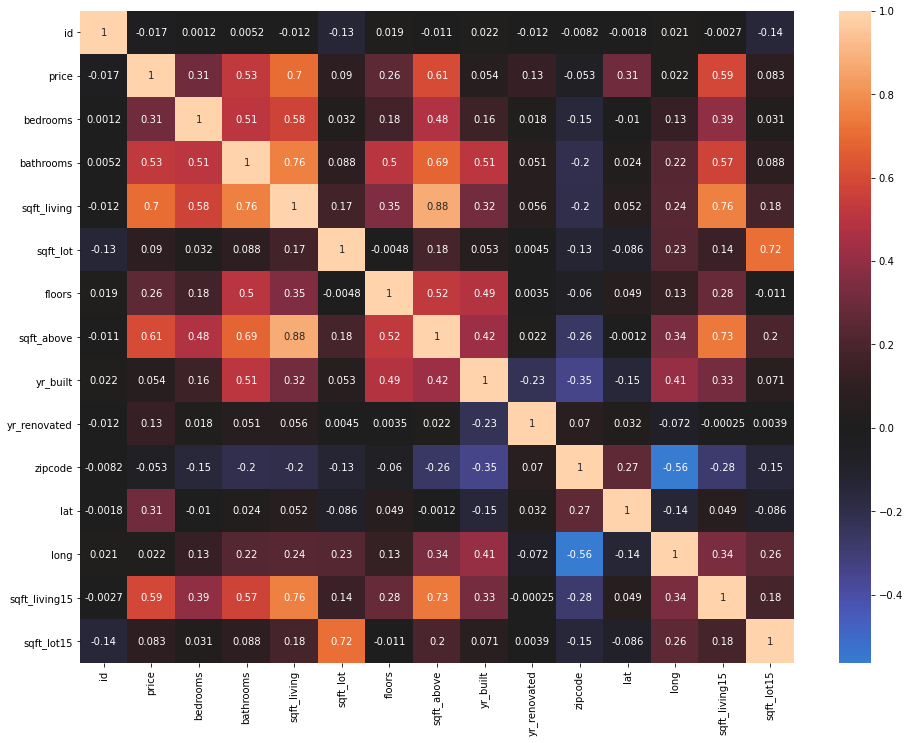

In [52]:
fig, ax = plt.subplots(figsize = (16, 12))
sns.heatmap(df.corr(), center=0, annot=True);

In [53]:
df.corr()['price'].sort_values(ascending=False).drop(['price'])

sqft_living      0.701917
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
bedrooms         0.308787
lat              0.306692
floors           0.256804
yr_renovated     0.129599
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
long             0.022036
id              -0.016772
zipcode         -0.053402
Name: price, dtype: float64

In [54]:
type(df.corr()['price'].sort_values(ascending=False))

pandas.core.series.Series

In [55]:
df.corr()['price'].sort_values(ascending=False).drop(['price']).index

Index(['sqft_living', 'sqft_above', 'sqft_living15', 'bathrooms', 'bedrooms',
       'lat', 'floors', 'yr_renovated', 'sqft_lot', 'sqft_lot15', 'yr_built',
       'long', 'id', 'zipcode'],
      dtype='object')

In [56]:
df.corr()['price'].sort_values(ascending=False).drop(['price']).values

array([ 0.7019173 ,  0.60536794,  0.5852412 ,  0.52590562,  0.30878747,
        0.30669231,  0.25680354,  0.12959928,  0.08987622,  0.08284493,
        0.05395333,  0.02203632, -0.01677185, -0.05340243])

<ipython-input-57-c18c18377ed5>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Square Feet of Living Area',


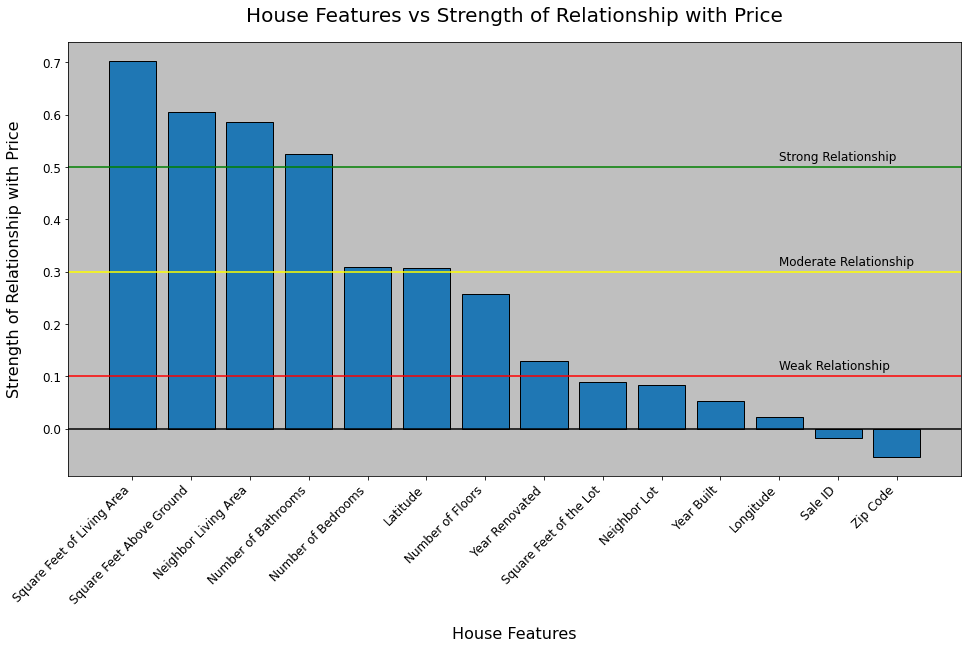

In [57]:
fig, ax = plt.subplots(figsize=(16,8))

ax.bar(x=df.corr()['price'].sort_values(ascending=False).drop(['price']).index,
       height=df.corr()['price'].sort_values(ascending=False).drop(['price']).values,
       edgecolor="black")
ax.set_xlabel('House Features',
              labelpad=20,
              fontsize=16)
ax.set_ylabel('Strength of Relationship with Price',
              labelpad=20,
              fontsize=16)
ax.set_title('House Features vs Strength of Relationship with Price',
             pad=20,
             fontsize=20)
ax.set_xticklabels(['Square Feet of Living Area',
                   'Square Feet Above Ground',
                   'Neighbor Living Area',
                   'Number of Bathrooms',
                   'Number of Bedrooms',
                   'Latitude',
                   'Number of Floors',
                   'Year Renovated',
                   'Square Feet of the Lot',
                   'Neighbor Lot',
                   'Year Built',
                   'Longitude',
                   'Sale ID',
                   'Zip Code'],
                   rotation=45,
                   ha="right")
ax.tick_params(axis='both',
               which='major',
               labelsize=12)

plt.axhline(y=0.0,
            color="black")
plt.axhline(y=0.1,
            color="red")
plt.text(x=11,
         y=0.1125,
         s='Weak Relationship',
         fontsize=12)
plt.text(x=11,
         y=0.3125,
         s='Moderate Relationship',
         fontsize=12)
plt.text(x=11,
         y=0.5125,
         s='Strong Relationship',
         fontsize=12)
plt.axhline(y=0.3,
            color="yellow")
plt.axhline(y=0.5,
            color="green")

ax.set_facecolor("0.75");

In [58]:
X_train.corr()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
id,1.000000,0.004282,0.008268,-0.007991,-0.136131,0.023808,-0.008983,-0.020823,0.007457,0.020668
bedrooms,0.004282,1.000000,0.529181,0.594505,0.039387,0.184185,0.005520,0.019876,0.366256,0.158796
bathrooms,0.008268,0.529181,1.000000,0.759379,0.090240,0.502708,0.068039,-0.122928,0.665321,0.499490
sqft_living,-0.007991,0.594505,0.759379,1.000000,0.182949,0.353248,0.106179,-0.055732,0.761982,0.315332
sqft_lot,-0.136131,0.039387,0.090240,0.182949,1.000000,-0.002653,0.020322,-0.010931,0.120422,0.057911
floors,0.023808,0.184185,0.502708,0.353248,-0.002653,1.000000,0.020885,-0.262634,0.458559,0.488890
waterfront,-0.008983,0.005520,0.068039,0.106179,0.020322,0.020885,1.000000,0.023514,0.081852,-0.024862
condition,-0.020823,0.019876,-0.122928,-0.055732,-0.010931,-0.262634,0.023514,1.000000,-0.143166,-0.365440
grade,0.007457,0.366256,0.665321,0.761982,0.120422,0.458559,0.081852,-0.143166,1.000000,0.441109
yr_built,0.020668,0.158796,0.499490,0.315332,0.057911,0.488890,-0.024862,-0.365440,0.441109,1.000000


In [59]:
abs(X_train.corr()) > 0.70

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
id,True,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False,False
sqft_living,False,False,True,True,False,False,False,False,True,False
sqft_lot,False,False,False,False,True,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False
condition,False,False,False,False,False,False,False,True,False,False
grade,False,False,False,True,False,False,False,False,True,False
yr_built,False,False,False,False,False,False,False,False,False,True


In [60]:
abs_corr_X=X_train.corr().abs().stack().reset_index().sort_values(0, ascending=False)

abs_corr_X['pairs'] = list(zip(abs_corr_X.level_0, abs_corr_X.level_1))

abs_corr_X.set_index(['pairs'], inplace = True)

abs_corr_X.drop(columns=['level_1', 'level_0'], inplace = True)

abs_corr_X.columns = ['cc']

abs_corr_X.drop_duplicates(inplace=True)

In [61]:
abs_corr_X[(abs_corr_X.cc>.70) & (abs_corr_X.cc <1)]

,cc
pairs,
"(sqft_living, grade)",0.761982
"(bathrooms, sqft_living)",0.759379


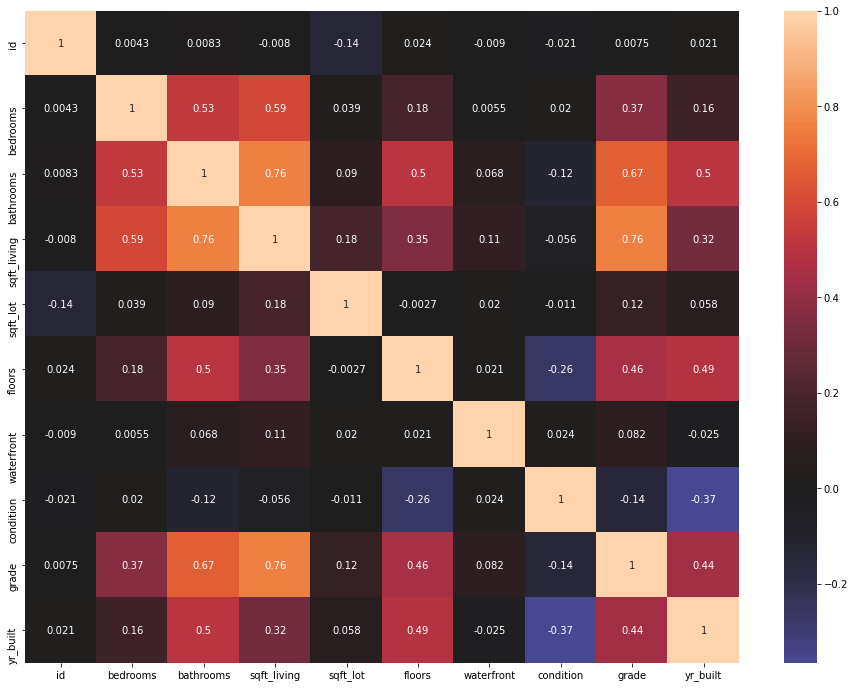

In [62]:
fig, ax = plt.subplots(figsize = (16, 12))
sns.heatmap(X_train.corr(), center=0, annot=True);

## ols Linear Regressions

In [63]:
relevant_columns

['id',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'condition',
 'grade',
 'yr_built']

In [64]:
formula_one = 'price ~ sqft_living'
model_one = ols(formula_one, df).fit()
model_one_summary = model_one.summary()
model_one_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Thu, 04 Aug 2022   Prob (F-statistic):               0.00
Time:                        00:18:16   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [65]:
formula_two = 'price ~ bathrooms'
model_two = ols(formula_two, df).fit()
model_two_summary = model_two.summary()
model_two_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     8256.
Date:                Thu, 04 Aug 2022   Prob (F-statistic):               0.00
Time:                        00:18:16   Log-Likelihood:            -3.0389e+05
No. Observations:               21597   AIC:                         6.078e+05
Df Residuals:                   21595   BIC:                         6.078e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8712.6518   6224.769      1.400      0.162   -3488.356    2.09e+04
bathrooms   2.512e+05   2765.054     90.863      0.000    2.46e+05    2.57e+05
==============================================================================
Omnibus:                    17251.570   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           882735.889
Skew:                           3.452   Prob(JB):                         0.00
Kurtosis:                      33.550   Cond. No.                         7.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
formula_three = 'price ~ bedrooms'
model_three = ols(formula_three, df).fit()
model_three_summary = model_three.summary()
model_three_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     2276.
Date:                Thu, 04 Aug 2022   Prob (F-statistic):               0.00
Time:                        00:18:16   Log-Likelihood:            -3.0631e+05
No. Observations:               21597   AIC:                         6.126e+05
Df Residuals:                   21595   BIC:                         6.126e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.272e+05   8979.293     14.166      0.000     1.1e+05    1.45e+05
bedrooms    1.225e+05   2566.930     47.709      0.000    1.17e+05    1.27e+05
==============================================================================
Omnibus:                    18831.341   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1195104.832
Skew:                           3.900   Prob(JB):                         0.00
Kurtosis:                      38.598   Cond. No.                         14.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## OLS Linear Regressions

In [67]:
model_four = sm.OLS(y_train, sm.add_constant(X_train['sqft_living'])).fit()
model_four_summary = model_four.summary()
model_four_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                 1.559e+04
Date:                Thu, 04 Aug 2022   Prob (F-statistic):               0.00
Time:                        00:18:17   Log-Likelihood:            -2.2503e+05
No. Observations:               16197   AIC:                         4.501e+05
Df Residuals:                   16195   BIC:                         4.501e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.099e+04   5095.343     -8.044      0.000    -5.1e+04    -3.1e+04
sqft_living   279.4423      2.238    124.878      0.000     275.056     283.828
==============================================================================
Omnibus:                    10430.239   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           291279.150
Skew:                           2.656   Prob(JB):                         0.00
Kurtosis:                      23.084   Cond. No.                     5.65e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.65e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [68]:
model_five = sm.OLS(y_train, sm.add_constant(X_train['bathrooms'])).fit()
model_five_summary = model_five.summary()
model_five_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     6323.
Date:                Thu, 04 Aug 2022   Prob (F-statistic):               0.00
Time:                        00:18:17   Log-Likelihood:            -2.2782e+05
No. Observations:               16197   AIC:                         4.556e+05
Df Residuals:                   16195   BIC:                         4.557e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6346.9562   7156.513      0.887      0.375   -7680.601    2.04e+04
bathrooms   2.528e+05   3178.595     79.518      0.000    2.47e+05    2.59e+05
==============================================================================
Omnibus:                    12002.593   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           436399.549
Skew:                           3.182   Prob(JB):                         0.00
Kurtosis:                      27.620   Cond. No.                         7.77
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
model_six = sm.OLS(y_train, sm.add_constant(X_train['bedrooms'])).fit()
model_six_summary = model_six.summary()
model_six_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     1851.
Date:                Thu, 04 Aug 2022   Prob (F-statistic):               0.00
Time:                        00:18:17   Log-Likelihood:            -2.2961e+05
No. Observations:               16197   AIC:                         4.592e+05
Df Residuals:                   16195   BIC:                         4.592e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.046e+05   1.05e+04      9.949      0.000     8.4e+04    1.25e+05
bedrooms    1.295e+05   3010.210     43.021      0.000    1.24e+05    1.35e+05
==============================================================================
Omnibus:                    13395.379   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           633584.351
Skew:                           3.681   Prob(JB):                         0.00
Kurtosis:                      32.743   Cond. No.                         14.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
model_seven = sm.OLS(y_train, sm.add_constant(X_train)).fit()
model_seven_summary = model_seven.summary()
model_seven_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     3031.
Date:                Thu, 04 Aug 2022   Prob (F-statistic):               0.00
Time:                        00:18:17   Log-Likelihood:            -2.2194e+05
No. Observations:               16197   AIC:                         4.439e+05
Df Residuals:                   16186   BIC:                         4.440e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        7.186e+06   1.48e+05     48.587      0.000     6.9e+06    7.48e+06
id          -2.132e-06   5.94e-07     -3.587      0.000    -3.3e-06   -9.67e-07
bedrooms    -4.389e+04   2431.755    -18.049      0.000   -4.87e+04   -3.91e+04
bathrooms    5.243e+04   3967.136     13.215      0.000    4.46e+04    6.02e+04
sqft_living   173.0589      3.814     45.375      0.000     165.583     180.535
sqft_lot       -0.3098      0.043     -7.179      0.000      -0.394      -0.225
floors       2.222e+04   3949.831      5.627      0.000    1.45e+04       3e+04
waterfront     7.6e+05   2.08e+04     36.508      0.000    7.19e+05    8.01e+05
condition    2.085e+04   2842.858      7.333      0.000    1.53e+04    2.64e+04
grade        1.334e+05   2463.565     54.133      0.000    1.29e+05    1.38e+05
yr_built    -3888.4011     76.011    -51.156      0.000   -4037.391   -3739.412
==============================================================================
Omnibus:                    11363.850   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           571465.203
Skew:                           2.808   Prob(JB):                         0.00
Kurtosis:                      31.552   Cond. No.                     4.73e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.73e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [71]:
model_eight = sm.OLS(y_train, sm.add_constant(X_train[['sqft_living', 'bathrooms', 'bedrooms']])).fit()
model_eight_summary = model_eight.summary()
model_eight_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     5508.
Date:                Thu, 04 Aug 2022   Prob (F-statistic):               0.00
Time:                        00:18:17   Log-Likelihood:            -2.2479e+05
No. Observations:               16197   AIC:                         4.496e+05
Df Residuals:                   16193   BIC:                         4.496e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        8.194e+04   8153.936     10.049      0.000     6.6e+04    9.79e+04
sqft_living   308.3478      3.617     85.238      0.000     301.257     315.438
bathrooms    1.106e+04   4098.344      2.698      0.007    3023.334    1.91e+04
bedrooms    -6.125e+04   2811.468    -21.787      0.000   -6.68e+04   -5.57e+04
==============================================================================
Omnibus:                    10136.685   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           263008.779
Skew:                           2.572   Prob(JB):                         0.00
Kurtosis:                      22.059   Cond. No.                     9.53e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.53e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Tune the Models

## Remove Columns with No Value

In [72]:
X_train.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
6405,3905080280,3,2.50,1880,4499,2.0,0.0,2.0,5.0,1993
937,5466420030,3,2.50,2020,6564,1.0,0.0,2.0,4.0,1994
19076,2623069010,5,4.00,4720,493534,2.0,0.0,4.0,6.0,1975
15201,4443800545,2,2.00,1430,3880,1.0,0.0,3.0,4.0,1949
13083,9485930120,3,2.25,2270,32112,1.0,0.0,3.0,5.0,1980


In [73]:
X_train = X_train.drop(['id'], axis=1)

In [74]:
X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
6405,3,2.50,1880,4499,2.0,0.0,2.0,5.0,1993
937,3,2.50,2020,6564,1.0,0.0,2.0,4.0,1994
19076,5,4.00,4720,493534,2.0,0.0,4.0,6.0,1975
15201,2,2.00,1430,3880,1.0,0.0,3.0,4.0,1949
13083,3,2.25,2270,32112,1.0,0.0,3.0,5.0,1980


In [75]:
model_nine = sm.OLS(y_train, sm.add_constant(X_train)).fit()
model_nine_summary = model_nine.summary()
model_nine_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     3363.
Date:                Thu, 04 Aug 2022   Prob (F-statistic):               0.00
Time:                        00:18:17   Log-Likelihood:            -2.2195e+05
No. Observations:               16197   AIC:                         4.439e+05
Df Residuals:                   16187   BIC:                         4.440e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        7.182e+06   1.48e+05     48.544      0.000    6.89e+06    7.47e+06
bedrooms    -4.391e+04   2432.642    -18.049      0.000   -4.87e+04   -3.91e+04
bathrooms    5.243e+04   3968.590     13.212      0.000    4.47e+04    6.02e+04
sqft_living   173.0641      3.815     45.359      0.000     165.585     180.543
sqft_lot       -0.2889      0.043     -6.754      0.000      -0.373      -0.205
floors       2.214e+04   3951.215      5.604      0.000    1.44e+04    2.99e+04
waterfront   7.605e+05   2.08e+04     36.519      0.000     7.2e+05    8.01e+05
condition    2.097e+04   2843.685      7.375      0.000    1.54e+04    2.65e+04
grade        1.333e+05   2464.390     54.086      0.000    1.28e+05    1.38e+05
yr_built    -3891.4674     76.034    -51.181      0.000   -4040.502   -3742.433
==============================================================================
Omnibus:                    11354.638   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           568028.465
Skew:                           2.806   Prob(JB):                         0.00
Kurtosis:                      31.464   Cond. No.                     3.79e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.79e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Remove Columns Which Perfectly Predict Other Columns - Dummy Defaults

In [76]:
# X_train.head()

In [77]:
# X_train = X_train.drop(['Average'], axis=1)

In [78]:
# X_train.head()

In [79]:
# model_ten = sm.OLS(y_train, sm.add_constant(X_train)).fit()
# model_ten_summary = model_ten.summary()
# model_ten_summary

In [80]:
# X_train = X_train.drop(['7 Average'], axis=1)

In [81]:
# X_train.head()

In [82]:
# model_eleven = sm.OLS(y_train, sm.add_constant(X_train)).fit()
# model_eleven_summary = model_eleven.summary()
# model_eleven_summary

## Remove Columns Which are Not Statistically Significant

In [83]:
# X_train.head()

In [84]:
# X_train = X_train.drop(['Fair'], axis=1)

In [85]:
# X_train.head()

In [86]:
# model_twelve = sm.OLS(y_train, sm.add_constant(X_train)).fit()
# model_twelve_summary = model_twelve.summary()
# model_twelve_summary

In [87]:
# X_train = X_train.drop(['Poor'], axis=1)

In [88]:
# X_train.head()

In [89]:
# model_thirteen = sm.OLS(y_train, sm.add_constant(X_train)).fit()
# model_thirteen_summary = model_thirteen.summary()
# model_thirteen_summary

In [90]:
# X_train = X_train.drop(['3 Poor'], axis=1)

In [91]:
# X_train.head()

In [92]:
# model_fourteen = sm.OLS(y_train, sm.add_constant(X_train)).fit()
# model_fourteen_summary = model_fourteen.summary()
# model_fourteen_summary

## Troubleshoot Unusual Coefficients

## Isolate Square Footage Living Area from Multicollinearity

In [93]:
# X_train.head()

In [94]:
# X_train = X_train.drop(['sqft_living'], axis=1)

In [95]:
# X_train.head()

In [96]:
# model_fifteen = sm.OLS(y_train, sm.add_constant(X_train)).fit()
# model_fifteen_summary = model_fifteen.summary()
# model_fifteen_summary

In [97]:
# X_train = X_train.drop(['yr_built'], axis=1)

In [98]:
# X_train.head()

In [99]:
# model_sixteen = sm.OLS(y_train, sm.add_constant(X_train)).fit()
# model_sixteen_summary = model_sixteen.summary()
# model_sixteen_summary

In [100]:
# X_train.head()

In [101]:
# X_train = X_train.drop(['bathrooms'], axis=1)

In [102]:
# X_train.head()

In [103]:
# model_seventeen = sm.OLS(y_train, sm.add_constant(X_train)).fit()
# model_seventeen_summary = model_seventeen.summary()
# model_seventeen_summary

In [104]:
# X_train = X_train.drop(['bedrooms'], axis=1)

In [105]:
# X_train.head()

In [106]:
# model_eighteen = sm.OLS(y_train, sm.add_constant(X_train)).fit()
# model_eighteen_summary = model_eighteen.summary()
# model_eighteen_summary

In [107]:
# X_train = X_train.drop(['yr_built'], axis=1)

In [108]:
# X_train.head()

In [109]:
# model_nineteen = sm.OLS(y_train, sm.add_constant(X_train)).fit()
# model_nineteen_summary = model_nineteen.summary()
# model_nineteen_summary

In [110]:
# X_train = X_train.drop(['floors'], axis=1)

In [111]:
# X_train.head()

In [112]:
# model_twenty = sm.OLS(y_train, sm.add_constant(X_train)).fit()
# model_twenty_summary = model_twenty.summary()
# model_twenty_summary

In [113]:
# X_train = X_train.drop(['sqft_lot'], axis=1)

In [114]:
# X_train.head()

In [115]:
# model_twenty_one = sm.OLS(y_train, sm.add_constant(X_train)).fit()
# model_twenty_one_summary = model_twenty_one.summary()
# model_twenty_one_summary

In [116]:
# X_train = X_train.drop(['4 Low'], axis=1)

In [117]:
# X_train.head()

In [118]:
# model_twenty_two = sm.OLS(y_train, sm.add_constant(X_train)).fit()
# model_twenty_two_summary = model_twenty_two.summary()
# model_twenty_two_summary

In [119]:
# X_train.corr()

## Binning

In [120]:
X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
6405,3,2.50,1880,4499,2.0,0.0,2.0,5.0,1993
937,3,2.50,2020,6564,1.0,0.0,2.0,4.0,1994
19076,5,4.00,4720,493534,2.0,0.0,4.0,6.0,1975
15201,2,2.00,1430,3880,1.0,0.0,3.0,4.0,1949
13083,3,2.25,2270,32112,1.0,0.0,3.0,5.0,1980


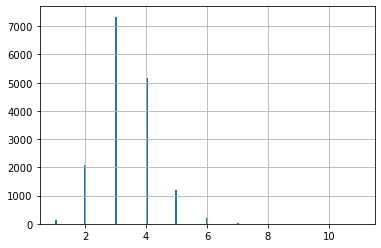

In [121]:
X_train['bedrooms'].hist(bins="auto");

In [122]:
X_train['bedrooms'].value_counts()

3     7339
4     5184
2     2074
5     1199
6      199
1      152
7       33
8       10
9        4
10       2
11       1
Name: bedrooms, dtype: int64

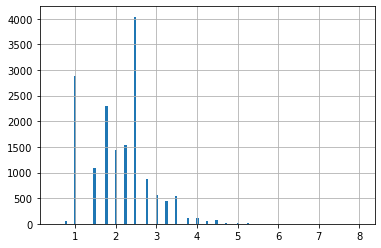

In [123]:
X_train['bathrooms'].hist(bins="auto");

In [124]:
X_train['bathrooms'].value_counts()

2.50    4038
1.00    2878
1.75    2296
2.25    1528
2.00    1433
1.50    1097
2.75     879
3.00     571
3.50     550
3.25     441
4.00     111
3.75     109
4.50      80
4.25      64
0.75      53
4.75      19
5.00      14
5.25      10
1.25       5
5.50       5
0.50       4
6.00       3
5.75       3
6.50       2
8.00       2
6.75       2
Name: bathrooms, dtype: int64

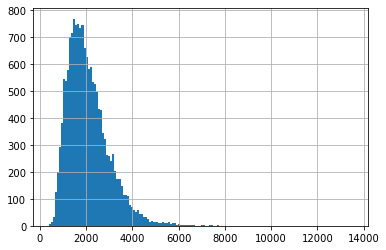

In [125]:
X_train['sqft_living'].hist(bins="auto");

In [126]:
X_train['sqft_living'].value_counts()

1800    104
1300    103
1010    101
1540    100
1480     99
       ... 
4870      1
2885      1
5030      1
5070      1
1867      1
Name: sqft_living, Length: 896, dtype: int64

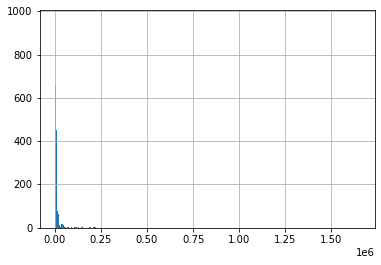

In [127]:
X_train['sqft_lot'].hist(bins="auto");

In [128]:
X_train['sqft_lot'].value_counts()

5000     264
6000     209
4000     189
7200     167
7500      96
        ... 
7847       1
5806       1
9904       1
18815      1
43017      1
Name: sqft_lot, Length: 8015, dtype: int64

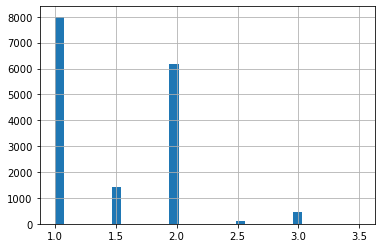

In [129]:
X_train['floors'].hist(bins="auto");

In [130]:
X_train['floors'].value_counts()

1.0    8002
2.0    6185
1.5    1425
3.0     463
2.5     115
3.5       7
Name: floors, dtype: int64

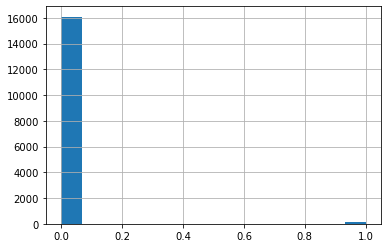

In [131]:
X_train['waterfront'].hist(bins="auto");

In [132]:
X_train['waterfront'].value_counts()

0.0    16086
1.0      111
Name: waterfront, dtype: int64

In [133]:
X_train['yr_built'].value_counts()

2014    417
2006    345
2005    342
1977    327
2004    324
       ... 
2015     26
1901     24
1902     19
1934     16
1935     16
Name: yr_built, Length: 116, dtype: int64

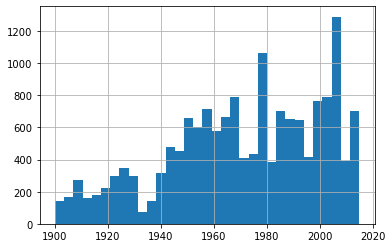

In [134]:
X_train['yr_built'].hist(bins="auto");

In [135]:
X_train['old'] = X_train['yr_built'] < 1930

In [136]:
X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,old
6405,3,2.50,1880,4499,2.0,0.0,2.0,5.0,1993,False
937,3,2.50,2020,6564,1.0,0.0,2.0,4.0,1994,False
19076,5,4.00,4720,493534,2.0,0.0,4.0,6.0,1975,False
15201,2,2.00,1430,3880,1.0,0.0,3.0,4.0,1949,False
13083,3,2.25,2270,32112,1.0,0.0,3.0,5.0,1980,False


In [137]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16197 entries, 6405 to 15795
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bedrooms     16197 non-null  int64  
 1   bathrooms    16197 non-null  float64
 2   sqft_living  16197 non-null  int64  
 3   sqft_lot     16197 non-null  int64  
 4   floors       16197 non-null  float64
 5   waterfront   16197 non-null  float64
 6   condition    16197 non-null  float64
 7   grade        16197 non-null  float64
 8   yr_built     16197 non-null  int64  
 9   old          16197 non-null  bool   
dtypes: bool(1), float64(5), int64(4)
memory usage: 1.3 MB


In [138]:
old_train = X_train[['old']]
encoder_old = OrdinalEncoder()
encoder_old.fit(old_train)
encoder_old.categories_[0]
old_encoded_train = encoder_old.transform(old_train)
old_encoded_train = old_encoded_train.flatten()
old_encoded_train
X_train['old'] = old_encoded_train
X_train.head()
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16197 entries, 6405 to 15795
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bedrooms     16197 non-null  int64  
 1   bathrooms    16197 non-null  float64
 2   sqft_living  16197 non-null  int64  
 3   sqft_lot     16197 non-null  int64  
 4   floors       16197 non-null  float64
 5   waterfront   16197 non-null  float64
 6   condition    16197 non-null  float64
 7   grade        16197 non-null  float64
 8   yr_built     16197 non-null  int64  
 9   old          16197 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 1.4 MB


In [139]:
model_twenty_three = sm.OLS(y_train, sm.add_constant(X_train)).fit()
model_twenty_three_summary = model_twenty_three.summary()
model_twenty_three_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     3028.
Date:                Thu, 04 Aug 2022   Prob (F-statistic):               0.00
Time:                        00:18:25   Log-Likelihood:            -2.2195e+05
No. Observations:               16197   AIC:                         4.439e+05
Df Residuals:                   16186   BIC:                         4.440e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        7.469e+06    2.2e+05     33.892      0.000    7.04e+06     7.9e+06
bedrooms    -4.419e+04   2437.956    -18.127      0.000    -4.9e+04   -3.94e+04
bathrooms    5.327e+04   3996.908     13.328      0.000    4.54e+04    6.11e+04
sqft_living   172.8251      3.818     45.271      0.000     165.342     180.308
sqft_lot       -0.2904      0.043     -6.786      0.000      -0.374      -0.206
floors        2.49e+04   4251.768      5.856      0.000    1.66e+04    3.32e+04
waterfront   7.586e+05   2.08e+04     36.389      0.000    7.18e+05    7.99e+05
condition    2.058e+04   2852.258      7.216      0.000     1.5e+04    2.62e+04
grade        1.335e+05   2466.202     54.117      0.000    1.29e+05    1.38e+05
yr_built    -4037.9956    112.997    -35.735      0.000   -4259.483   -3816.508
old         -1.417e+04   8083.198     -1.753      0.080      -3e+04    1675.320
==============================================================================
Omnibus:                    11345.271   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           567606.530
Skew:                           2.802   Prob(JB):                         0.00
Kurtosis:                      31.454   Cond. No.                     5.64e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.64e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [140]:
X_train['middle'] = (X_train['yr_built'] > 1930) & (X_train['yr_built'] < 1970)

In [141]:
X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,old,middle
6405,3,2.50,1880,4499,2.0,0.0,2.0,5.0,1993,0.0,False
937,3,2.50,2020,6564,1.0,0.0,2.0,4.0,1994,0.0,False
19076,5,4.00,4720,493534,2.0,0.0,4.0,6.0,1975,0.0,False
15201,2,2.00,1430,3880,1.0,0.0,3.0,4.0,1949,0.0,True
13083,3,2.25,2270,32112,1.0,0.0,3.0,5.0,1980,0.0,False


In [142]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16197 entries, 6405 to 15795
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bedrooms     16197 non-null  int64  
 1   bathrooms    16197 non-null  float64
 2   sqft_living  16197 non-null  int64  
 3   sqft_lot     16197 non-null  int64  
 4   floors       16197 non-null  float64
 5   waterfront   16197 non-null  float64
 6   condition    16197 non-null  float64
 7   grade        16197 non-null  float64
 8   yr_built     16197 non-null  int64  
 9   old          16197 non-null  float64
 10  middle       16197 non-null  bool   
dtypes: bool(1), float64(6), int64(4)
memory usage: 1.4 MB


In [143]:
middle_train = X_train[['middle']]
encoder_middle = OrdinalEncoder()
encoder_middle.fit(middle_train)
encoder_middle.categories_[0]
middle_encoded_train = encoder_middle.transform(middle_train)
middle_encoded_train = middle_encoded_train.flatten()
middle_encoded_train
X_train['middle'] = middle_encoded_train
X_train.head()
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16197 entries, 6405 to 15795
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bedrooms     16197 non-null  int64  
 1   bathrooms    16197 non-null  float64
 2   sqft_living  16197 non-null  int64  
 3   sqft_lot     16197 non-null  int64  
 4   floors       16197 non-null  float64
 5   waterfront   16197 non-null  float64
 6   condition    16197 non-null  float64
 7   grade        16197 non-null  float64
 8   yr_built     16197 non-null  int64  
 9   old          16197 non-null  float64
 10  middle       16197 non-null  float64
dtypes: float64(7), int64(4)
memory usage: 1.5 MB


In [144]:
model_twenty_four = sm.OLS(y_train, sm.add_constant(X_train)).fit()
model_twenty_four_summary = model_twenty_four.summary()
model_twenty_four_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     2772.
Date:                Thu, 04 Aug 2022   Prob (F-statistic):               0.00
Time:                        00:18:25   Log-Likelihood:            -2.2191e+05
No. Observations:               16197   AIC:                         4.438e+05
Df Residuals:                   16185   BIC:                         4.439e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        5.547e+06   3.11e+05     17.845      0.000    4.94e+06    6.16e+06
bedrooms    -4.556e+04   2437.277    -18.691      0.000   -5.03e+04   -4.08e+04
bathrooms    5.579e+04   3998.005     13.954      0.000    4.79e+04    6.36e+04
sqft_living   172.3544      3.809     45.248      0.000     164.888     179.821
sqft_lot       -0.2661      0.043     -6.220      0.000      -0.350      -0.182
floors        2.57e+04   4242.876      6.056      0.000    1.74e+04     3.4e+04
waterfront   7.563e+05   2.08e+04     36.359      0.000    7.16e+05    7.97e+05
condition    2.044e+04   2845.681      7.181      0.000    1.49e+04     2.6e+04
grade        1.342e+05   2461.976     54.515      0.000    1.29e+05    1.39e+05
yr_built    -3080.4857    157.166    -19.600      0.000   -3388.548   -2772.423
old           6.87e+04   1.24e+04      5.521      0.000    4.43e+04    9.31e+04
middle       5.792e+04   6624.071      8.744      0.000    4.49e+04    7.09e+04
==============================================================================
Omnibus:                    11323.122   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           567353.510
Skew:                           2.793   Prob(JB):                         0.00
Kurtosis:                      31.451   Cond. No.                     7.98e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.98e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [145]:
X_train['newish'] = (X_train['yr_built'] > 1970) & (X_train['yr_built'] < 1990)

In [146]:
X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,old,middle,newish
6405,3,2.50,1880,4499,2.0,0.0,2.0,5.0,1993,0.0,0.0,False
937,3,2.50,2020,6564,1.0,0.0,2.0,4.0,1994,0.0,0.0,False
19076,5,4.00,4720,493534,2.0,0.0,4.0,6.0,1975,0.0,0.0,True
15201,2,2.00,1430,3880,1.0,0.0,3.0,4.0,1949,0.0,1.0,False
13083,3,2.25,2270,32112,1.0,0.0,3.0,5.0,1980,0.0,0.0,True


In [147]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16197 entries, 6405 to 15795
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bedrooms     16197 non-null  int64  
 1   bathrooms    16197 non-null  float64
 2   sqft_living  16197 non-null  int64  
 3   sqft_lot     16197 non-null  int64  
 4   floors       16197 non-null  float64
 5   waterfront   16197 non-null  float64
 6   condition    16197 non-null  float64
 7   grade        16197 non-null  float64
 8   yr_built     16197 non-null  int64  
 9   old          16197 non-null  float64
 10  middle       16197 non-null  float64
 11  newish       16197 non-null  bool   
dtypes: bool(1), float64(7), int64(4)
memory usage: 1.5 MB


In [148]:
newish_train = X_train[['newish']]
encoder_newish = OrdinalEncoder()
encoder_newish.fit(newish_train)
encoder_newish.categories_[0]
newish_encoded_train = encoder_newish.transform(newish_train)
newish_encoded_train = newish_encoded_train.flatten()
newish_encoded_train
X_train['newish'] = newish_encoded_train
X_train.head()
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16197 entries, 6405 to 15795
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bedrooms     16197 non-null  int64  
 1   bathrooms    16197 non-null  float64
 2   sqft_living  16197 non-null  int64  
 3   sqft_lot     16197 non-null  int64  
 4   floors       16197 non-null  float64
 5   waterfront   16197 non-null  float64
 6   condition    16197 non-null  float64
 7   grade        16197 non-null  float64
 8   yr_built     16197 non-null  int64  
 9   old          16197 non-null  float64
 10  middle       16197 non-null  float64
 11  newish       16197 non-null  float64
dtypes: float64(8), int64(4)
memory usage: 1.6 MB


In [149]:
model_twenty_five = sm.OLS(y_train, sm.add_constant(X_train)).fit()
model_twenty_five_summary = model_twenty_five.summary()
model_twenty_five_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     2544.
Date:                Thu, 04 Aug 2022   Prob (F-statistic):               0.00
Time:                        00:18:25   Log-Likelihood:            -2.2190e+05
No. Observations:               16197   AIC:                         4.438e+05
Df Residuals:                   16184   BIC:                         4.439e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        6.191e+06   3.64e+05     17.029      0.000    5.48e+06     6.9e+06
bedrooms    -4.483e+04   2445.854    -18.327      0.000   -4.96e+04      -4e+04
bathrooms    5.546e+04   3997.828     13.873      0.000    4.76e+04    6.33e+04
sqft_living   171.8707      3.810     45.105      0.000     164.402     179.340
sqft_lot       -0.2654      0.043     -6.205      0.000      -0.349      -0.182
floors       2.136e+04   4427.538      4.825      0.000    1.27e+04       3e+04
waterfront   7.568e+05   2.08e+04     36.395      0.000    7.16e+05    7.98e+05
condition    2.164e+04   2866.374      7.548      0.000     1.6e+04    2.73e+04
grade        1.345e+05   2463.134     54.625      0.000     1.3e+05    1.39e+05
yr_built    -3398.0582    182.618    -18.607      0.000   -3756.009   -3040.107
old          3.415e+04    1.6e+04      2.129      0.033    2704.267    6.56e+04
middle        3.42e+04   9602.064      3.561      0.000    1.54e+04     5.3e+04
newish      -2.172e+04   6366.682     -3.412      0.001   -3.42e+04   -9241.957
==============================================================================
Omnibus:                    11324.564   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           567713.890
Skew:                           2.794   Prob(JB):                         0.00
Kurtosis:                      31.460   Cond. No.                     9.34e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.34e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [150]:
X_train['new'] = X_train['yr_built'] > 1990

In [151]:
X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,old,middle,newish,new
6405,3,2.50,1880,4499,2.0,0.0,2.0,5.0,1993,0.0,0.0,0.0,True
937,3,2.50,2020,6564,1.0,0.0,2.0,4.0,1994,0.0,0.0,0.0,True
19076,5,4.00,4720,493534,2.0,0.0,4.0,6.0,1975,0.0,0.0,1.0,False
15201,2,2.00,1430,3880,1.0,0.0,3.0,4.0,1949,0.0,1.0,0.0,False
13083,3,2.25,2270,32112,1.0,0.0,3.0,5.0,1980,0.0,0.0,1.0,False


In [152]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16197 entries, 6405 to 15795
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bedrooms     16197 non-null  int64  
 1   bathrooms    16197 non-null  float64
 2   sqft_living  16197 non-null  int64  
 3   sqft_lot     16197 non-null  int64  
 4   floors       16197 non-null  float64
 5   waterfront   16197 non-null  float64
 6   condition    16197 non-null  float64
 7   grade        16197 non-null  float64
 8   yr_built     16197 non-null  int64  
 9   old          16197 non-null  float64
 10  middle       16197 non-null  float64
 11  newish       16197 non-null  float64
 12  new          16197 non-null  bool   
dtypes: bool(1), float64(8), int64(4)
memory usage: 1.6 MB


In [153]:
new_train = X_train[['new']]
encoder_new = OrdinalEncoder()
encoder_new.fit(new_train)
encoder_new.categories_[0]
new_encoded_train = encoder_new.transform(new_train)
new_encoded_train = new_encoded_train.flatten()
new_encoded_train
X_train['new'] = new_encoded_train
X_train.head()
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16197 entries, 6405 to 15795
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bedrooms     16197 non-null  int64  
 1   bathrooms    16197 non-null  float64
 2   sqft_living  16197 non-null  int64  
 3   sqft_lot     16197 non-null  int64  
 4   floors       16197 non-null  float64
 5   waterfront   16197 non-null  float64
 6   condition    16197 non-null  float64
 7   grade        16197 non-null  float64
 8   yr_built     16197 non-null  int64  
 9   old          16197 non-null  float64
 10  middle       16197 non-null  float64
 11  newish       16197 non-null  float64
 12  new          16197 non-null  float64
dtypes: float64(9), int64(4)
memory usage: 1.7 MB


In [154]:
model_twenty_six = sm.OLS(y_train, sm.add_constant(X_train)).fit()
model_twenty_six_summary = model_twenty_six.summary()
model_twenty_six_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     2357.
Date:                Thu, 04 Aug 2022   Prob (F-statistic):               0.00
Time:                        00:18:26   Log-Likelihood:            -2.2188e+05
No. Observations:               16197   AIC:                         4.438e+05
Df Residuals:                   16183   BIC:                         4.439e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        7.313e+06   4.02e+05     18.171      0.000    6.52e+06     8.1e+06
bedrooms     -4.38e+04   2447.882    -17.895      0.000   -4.86e+04    -3.9e+04
bathrooms    5.442e+04   3996.053     13.618      0.000    4.66e+04    6.23e+04
sqft_living   171.3843      3.806     45.025      0.000     163.923     178.845
sqft_lot       -0.2696      0.043     -6.311      0.000      -0.353      -0.186
floors       1.831e+04   4447.083      4.118      0.000    9594.824     2.7e+04
waterfront   7.583e+05   2.08e+04     36.510      0.000    7.18e+05    7.99e+05
condition    2.282e+04   2868.583      7.954      0.000    1.72e+04    2.84e+04
grade        1.354e+05   2463.695     54.965      0.000    1.31e+05     1.4e+05
yr_built    -3996.7246    204.553    -19.539      0.000   -4397.670   -3595.779
old          5.697e+04   1.64e+04      3.472      0.001    2.48e+04    8.91e+04
middle       7.888e+04   1.18e+04      6.673      0.000    5.57e+04    1.02e+05
newish       3.935e+04   1.14e+04      3.455      0.001     1.7e+04    6.17e+04
new          8.192e+04   1.27e+04      6.464      0.000    5.71e+04    1.07e+05
==============================================================================
Omnibus:                    11342.691   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           569978.541
Skew:                           2.800   Prob(JB):                         0.00
Kurtosis:                      31.517   Cond. No.                     1.03e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Polynomial Features

In [155]:
pf = PolynomialFeatures()
pf.fit(X_train)

PolynomialFeatures()

In [156]:
X_train_pdf = pd.DataFrame(pf.transform(X_train), columns=pf.get_feature_names())
X_train_pdf

,1,x0,x1,x2,x3,x4,x5,x6,x7,x8,...,x9^2,x9 x10,x9 x11,x9 x12,x10^2,x10 x11,x10 x12,x11^2,x11 x12,x12^2
0,1.0,3.0,2.50,1880.0,4499.0,2.0,0.0,2.0,5.0,1993.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,3.0,2.50,2020.0,6564.0,1.0,0.0,2.0,4.0,1994.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,5.0,4.00,4720.0,493534.0,2.0,0.0,4.0,6.0,1975.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,2.0,2.00,1430.0,3880.0,1.0,0.0,3.0,4.0,1949.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,3.0,2.25,2270.0,32112.0,1.0,0.0,3.0,5.0,1980.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16192,1.0,3.0,2.50,2230.0,5800.0,2.0,0.0,2.0,4.0,2004.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
16193,1.0,4.0,2.75,2770.0,3852.0,2.0,0.0,2.0,5.0,2014.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
16194,1.0,4.0,1.50,1530.0,9000.0,1.0,0.0,3.0,3.0,1976.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
16195,1.0,1.0,0.75,380.0,15000.0,1.0,0.0,2.0,2.0,1963.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [157]:
X_train_pdf.shape

(16197, 105)

In [158]:
lr = LinearRegression()

lr.fit(X_train_pdf, y_train)

LinearRegression()

In [159]:
lr.score(X_train_pdf, y_train)

0.7328488860580628

In [160]:
y_train.head()

6405     529000.0
937      253000.0
19076    745000.0
15201    545000.0
13083    390000.0
Name: price, dtype: float64

In [161]:
y_train_pdf = y_train.reset_index(drop = True)
y_train_pdf.head()

0    529000.0
1    253000.0
2    745000.0
3    545000.0
4    390000.0
Name: price, dtype: float64

In [162]:
model_twenty_seven = sm.OLS(y_train_pdf, sm.add_constant(X_train_pdf)).fit()
model_twenty_seven_summary = model_twenty_seven.summary()
model_twenty_seven_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     485.2
Date:                Thu, 04 Aug 2022   Prob (F-statistic):               0.00
Time:                        00:18:26   Log-Likelihood:            -2.1980e+05
No. Observations:               16197   AIC:                         4.398e+05
Df Residuals:                   16105   BIC:                         4.405e+05
Df Model:                          91                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
1           3.032e+05   4.02e+04      7.552      0.000    2.25e+05    3.82e+05
x0         -7.317e+05   5.03e+05     -1.454      0.146   -1.72e+06    2.54e+05
x1          9.831e+05   8.13e+05      1.208      0.227   -6.11e+05    2.58e+06
x2           625.8276    835.678      0.749      0.454   -1012.194    2263.849
x3           -21.9547      9.920     -2.213      0.027     -41.400      -2.510
x4         -1.572e+06   1.06e+06     -1.484      0.138   -3.65e+06    5.05e+05
x5         -1.037e+07   2.04e+06     -5.091      0.000   -1.44e+07   -6.38e+06
x6         -9.965e+05   5.68e+05     -1.754      0.079   -2.11e+06    1.17e+05
x7          5.946e+05   4.99e+05      1.191      0.234   -3.84e+05    1.57e+06
x8          5465.9760   1379.081      3.963      0.000    2762.824    8169.128
x9         -3.129e+06    6.9e+05     -4.532      0.000   -4.48e+06   -1.78e+06
x10         4.076e+05   5.96e+05      0.684      0.494   -7.61e+05    1.58e+06
x11        -1.423e+06   8.92e+05     -1.595      0.111   -3.17e+06    3.26e+05
x12        -9.581e+06   7.41e+05    -12.928      0.000    -1.1e+07   -8.13e+06
x0^2        1617.6955   1701.481      0.951      0.342   -1717.398    4952.788
x0 x1       1564.6622   4551.922      0.344      0.731   -7357.612    1.05e+04
x0 x2         -8.8269      4.565     -1.934      0.053     -17.775       0.121
x0 x3          0.1438      0.062      2.322      0.020       0.022       0.265
x0 x4       1.884e+04   5527.377      3.408      0.001    8004.707    2.97e+04
x0 x5       9.552e+04   2.23e+04      4.275      0.000    5.17e+04    1.39e+05
x0 x6      -8578.1093   3495.147     -2.454      0.014   -1.54e+04   -1727.231
x0 x7      -3608.5203   2953.529     -1.222      0.222   -9397.767    2180.726
x0 x8        373.1588    256.261      1.456      0.145    -129.141     875.458
x0 x9       2.577e+04   1.96e+04      1.315      0.189   -1.27e+04    6.42e+04
x0 x10     -2156.6354   1.48e+04     -0.146      0.884   -3.11e+04    2.68e+04
x0 x11      5094.6447   1.52e+04      0.335      0.738   -2.48e+04    3.49e+04
x0 x12     -5.159e+04   1.76e+04     -2.938      0.003    -8.6e+04   -1.72e+04
x1^2       -1.915e+04   5051.179     -3.791      0.000   -2.91e+04   -9250.251
x1 x2         36.0646      7.041      5.122      0.000      22.263      49.866
x1 x3         -0.3296      0.094     -3.500      0.000      -0.514      -0.145
x1 x4      -2.027e+04   8985.524     -2.256      0.024   -3.79e+04   -2655.795
x1 x5       7.053e+04   3.23e+04      2.186      0.029    7281.347    1.34e+05
x1 x6       1274.7900   5816.372      0.219      0.827   -1.01e+04    1.27e+04
x1 x7        1.52e+04   4803.003      3.165      0.002    5787.023    2.46e+04
x1 x8       -497.1823    413.259     -1.203      0.229   -1307.215     312.851
x1 x9      -5.875e+04   3.24e+04     -1.811      0.070   -1.22e+05    4847.471
x1

## Dealing with Outliers

In [163]:
X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,old,middle,newish,new
6405,3,2.50,1880,4499,2.0,0.0,2.0,5.0,1993,0.0,0.0,0.0,1.0
937,3,2.50,2020,6564,1.0,0.0,2.0,4.0,1994,0.0,0.0,0.0,1.0
19076,5,4.00,4720,493534,2.0,0.0,4.0,6.0,1975,0.0,0.0,1.0,0.0
15201,2,2.00,1430,3880,1.0,0.0,3.0,4.0,1949,0.0,1.0,0.0,0.0
13083,3,2.25,2270,32112,1.0,0.0,3.0,5.0,1980,0.0,0.0,1.0,0.0


In [164]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16197 entries, 6405 to 15795
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bedrooms     16197 non-null  int64  
 1   bathrooms    16197 non-null  float64
 2   sqft_living  16197 non-null  int64  
 3   sqft_lot     16197 non-null  int64  
 4   floors       16197 non-null  float64
 5   waterfront   16197 non-null  float64
 6   condition    16197 non-null  float64
 7   grade        16197 non-null  float64
 8   yr_built     16197 non-null  int64  
 9   old          16197 non-null  float64
 10  middle       16197 non-null  float64
 11  newish       16197 non-null  float64
 12  new          16197 non-null  float64
dtypes: float64(9), int64(4)
memory usage: 1.7 MB


In [165]:
16197 * 0.1 / 13

124.5923076923077

In [166]:
bedroom_drop_indices = X_train[X_train['bedrooms'] >= 7].index
bedroom_drop_indices

Int64Index([ 4063, 15056,  4863, 12752,  8748, 17221, 18960,  9723,  9068,
            18445, 19312,  8507,  4231, 12596,  4756,  9443,  3717,  8620,
            19287,  4092, 18462, 10264, 12593, 16722, 12872,  1658, 15008,
             8113,  6073, 13301, 14017, 12764,   556, 15232, 13107,  1134,
            14901, 14188,  7016,  4020, 16299,  4713, 10775, 18428,  1239,
             9650, 15507,  7184,  6168, 15147],
           dtype='int64')

In [167]:
X_train = X_train.drop(bedroom_drop_indices)

In [168]:
y_train = y_train.drop(bedroom_drop_indices)

In [169]:
X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,old,middle,newish,new
6405,3,2.50,1880,4499,2.0,0.0,2.0,5.0,1993,0.0,0.0,0.0,1.0
937,3,2.50,2020,6564,1.0,0.0,2.0,4.0,1994,0.0,0.0,0.0,1.0
19076,5,4.00,4720,493534,2.0,0.0,4.0,6.0,1975,0.0,0.0,1.0,0.0
15201,2,2.00,1430,3880,1.0,0.0,3.0,4.0,1949,0.0,1.0,0.0,0.0
13083,3,2.25,2270,32112,1.0,0.0,3.0,5.0,1980,0.0,0.0,1.0,0.0


In [170]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16147 entries, 6405 to 15795
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bedrooms     16147 non-null  int64  
 1   bathrooms    16147 non-null  float64
 2   sqft_living  16147 non-null  int64  
 3   sqft_lot     16147 non-null  int64  
 4   floors       16147 non-null  float64
 5   waterfront   16147 non-null  float64
 6   condition    16147 non-null  float64
 7   grade        16147 non-null  float64
 8   yr_built     16147 non-null  int64  
 9   old          16147 non-null  float64
 10  middle       16147 non-null  float64
 11  newish       16147 non-null  float64
 12  new          16147 non-null  float64
dtypes: float64(9), int64(4)
memory usage: 1.7 MB


In [171]:
X_train.shape

(16147, 13)

In [172]:
y_train.shape

(16147,)

In [173]:
bathroom_drop_indices = (X_train[(X_train['bathrooms'] == 4.75)
                  | (X_train['bathrooms'] == 5.00)
                  | (X_train['bathrooms'] == 5.25)
                  | (X_train['bathrooms'] == 1.25)
                  | (X_train['bathrooms'] == 5.50)
                  | (X_train['bathrooms'] == 0.50)
                  | (X_train['bathrooms'] == 6.00)
                  | (X_train['bathrooms'] == 5.75)
                  | (X_train['bathrooms'] == 6.50)
                  | (X_train['bathrooms'] == 8.00)
                  | (X_train['bathrooms'] == 6.75)]).index
bathroom_drop_indices

Int64Index([ 2234, 21490, 16826, 12029, 21536, 15249,  4407, 19133, 15578,
            13110,  7245,  3098,  2459,  1919, 12216,  8085,  2259, 14070,
             1434,  4692,  5205, 10413,  5697, 15539,  7028,   527,  1446,
             3118,  6502, 18273, 11662,  5874,  6227,   270, 18412, 17885,
             1313, 16759, 15898, 10362, 12358,  3381, 16434,  6495,   300,
            20648,  9265,  9943,  3867,  4145, 18640,  4594, 16789,  8438,
            18394, 16955, 21049, 19994, 19945,  2343, 20562, 20080],
           dtype='int64')

In [174]:
X_train = X_train.drop(bathroom_drop_indices)

In [175]:
y_train = y_train.drop(bathroom_drop_indices)

In [176]:
X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,old,middle,newish,new
6405,3,2.50,1880,4499,2.0,0.0,2.0,5.0,1993,0.0,0.0,0.0,1.0
937,3,2.50,2020,6564,1.0,0.0,2.0,4.0,1994,0.0,0.0,0.0,1.0
19076,5,4.00,4720,493534,2.0,0.0,4.0,6.0,1975,0.0,0.0,1.0,0.0
15201,2,2.00,1430,3880,1.0,0.0,3.0,4.0,1949,0.0,1.0,0.0,0.0
13083,3,2.25,2270,32112,1.0,0.0,3.0,5.0,1980,0.0,0.0,1.0,0.0


In [177]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16085 entries, 6405 to 15795
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bedrooms     16085 non-null  int64  
 1   bathrooms    16085 non-null  float64
 2   sqft_living  16085 non-null  int64  
 3   sqft_lot     16085 non-null  int64  
 4   floors       16085 non-null  float64
 5   waterfront   16085 non-null  float64
 6   condition    16085 non-null  float64
 7   grade        16085 non-null  float64
 8   yr_built     16085 non-null  int64  
 9   old          16085 non-null  float64
 10  middle       16085 non-null  float64
 11  newish       16085 non-null  float64
 12  new          16085 non-null  float64
dtypes: float64(9), int64(4)
memory usage: 1.7 MB


In [178]:
X_train.shape

(16085, 13)

In [179]:
y_train.shape

(16085,)

In [180]:
floors_drop_indices = (X_train[(X_train['floors'] == 2.5) | (X_train['floors'] == 3.5)]).index
floors_drop_indices

Int64Index([ 1769,  8145,  3920,  8628,  3855, 20756,  6301,  4807, 10265,
            21095,
            ...
            14083,  2475,  6764, 21329, 20979,  1625, 18520, 20150,  2427,
            10253],
           dtype='int64', length=116)

In [181]:
X_train = X_train.drop(floors_drop_indices)

In [182]:
y_train = y_train.drop(floors_drop_indices)

In [183]:
X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,old,middle,newish,new
6405,3,2.50,1880,4499,2.0,0.0,2.0,5.0,1993,0.0,0.0,0.0,1.0
937,3,2.50,2020,6564,1.0,0.0,2.0,4.0,1994,0.0,0.0,0.0,1.0
19076,5,4.00,4720,493534,2.0,0.0,4.0,6.0,1975,0.0,0.0,1.0,0.0
15201,2,2.00,1430,3880,1.0,0.0,3.0,4.0,1949,0.0,1.0,0.0,0.0
13083,3,2.25,2270,32112,1.0,0.0,3.0,5.0,1980,0.0,0.0,1.0,0.0


In [184]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15969 entries, 6405 to 15795
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bedrooms     15969 non-null  int64  
 1   bathrooms    15969 non-null  float64
 2   sqft_living  15969 non-null  int64  
 3   sqft_lot     15969 non-null  int64  
 4   floors       15969 non-null  float64
 5   waterfront   15969 non-null  float64
 6   condition    15969 non-null  float64
 7   grade        15969 non-null  float64
 8   yr_built     15969 non-null  int64  
 9   old          15969 non-null  float64
 10  middle       15969 non-null  float64
 11  newish       15969 non-null  float64
 12  new          15969 non-null  float64
dtypes: float64(9), int64(4)
memory usage: 1.7 MB


In [185]:
X_train.shape

(15969, 13)

In [186]:
y_train.shape

(15969,)

In [187]:
model_twenty_eight = sm.OLS(y_train, sm.add_constant(X_train)).fit()
model_twenty_eight_summary = model_twenty_eight.summary()
model_twenty_eight_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     2176.
Date:                Thu, 04 Aug 2022   Prob (F-statistic):               0.00
Time:                        00:18:27   Log-Likelihood:            -2.1765e+05
No. Observations:               15969   AIC:                         4.353e+05
Df Residuals:                   15955   BIC:                         4.354e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        6.849e+06    3.8e+05     18.028      0.000     6.1e+06    7.59e+06
bedrooms    -3.834e+04   2390.328    -16.041      0.000    -4.3e+04   -3.37e+04
bathrooms    4.582e+04   3833.565     11.953      0.000    3.83e+04    5.33e+04
sqft_living   152.3417      3.673     41.480      0.000     145.143     159.541
sqft_lot       -0.1978      0.040     -4.918      0.000      -0.277      -0.119
floors        2.16e+04   4262.564      5.067      0.000    1.32e+04       3e+04
waterfront    7.17e+05   2.01e+04     35.702      0.000    6.78e+05    7.56e+05
condition    2.284e+04   2694.884      8.474      0.000    1.76e+04    2.81e+04
grade        1.368e+05   2337.695     58.507      0.000    1.32e+05    1.41e+05
yr_built    -3746.1602    193.179    -19.392      0.000   -4124.812   -3367.508
old          5.447e+04   1.54e+04      3.528      0.000    2.42e+04    8.47e+04
middle       7.274e+04   1.11e+04      6.550      0.000     5.1e+04    9.45e+04
newish       3.569e+04   1.07e+04      3.345      0.001    1.48e+04    5.66e+04
new          7.338e+04   1.19e+04      6.187      0.000    5.01e+04    9.66e+04
==============================================================================
Omnibus:                     8548.079   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           159588.305
Skew:                           2.159   Prob(JB):                         0.00
Kurtosis:                      17.873   Cond. No.                     1.03e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [188]:
# X_train = X_train.drop(['sqft_lot'], axis=1)

In [189]:
# X_train.head()

In [190]:
# model_twenty_nine = sm.OLS(y_train, sm.add_constant(X_train)).fit()
# model_twenty_nine_summary = model_twenty_nine.summary()
# model_twenty_nine_summary

In [191]:
# X_train = X_train.drop(['yr_built', 'old', 'middle', 'newish', 'new'], axis=1)

In [192]:
# X_train.head()

In [193]:
# model_thirty = sm.OLS(y_train, sm.add_constant(X_train)).fit()
# model_thirty_summary = model_thirty.summary()
# model_thirty_summary

In [194]:
# model_thirty_one = sm.OLS(y_train, sm.add_constant(X_train[['bedrooms', 'bathrooms', 'sqft_living']])).fit()
# model_thirty_one_summary = model_thirty_one.summary()
# model_thirty_one_summary

## Interpreting the Results

For the purposes of inferential linear regression with an initial subset of the data, the model with the highest explanation of variance in price among the models with the lowest multicollinearity - Model Nine - explained approxiamtely 65% of the variance in price. The features with the most significant relationship with price were: grade, waterfront status, number of bathrooms, condition, and number of floors.